In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import 2012 - 2017 attendace data - years in columns
historical_attendence_data_0 = pd.read_excel("Resources/MLS_Historical_Attendance.xlsx",sheet_name="2012-2017")
historical_attendence_data_0=historical_attendence_data_0.rename(columns={"Team Name":"Team"})
historical_attendence_data=historical_attendence_data_0.set_index("Team")
historical_attendence_data

,Team Code,2012,2013,2014,2015,2016,2017
Team,,,,,,,
Atlanta United FC,ATL,NaN,NaN,NaN,NaN,NaN,48200
Chicago Fire,CHI,16409.0,15228.0,16076.0,16003.0,15602.0,17383
Colorado Rapids,COL,15175.0,15440.0,15082.0,15657.0,16278.0,15322
Columbus Crew,CLB,14397.0,16080.0,16881.0,16985.0,17125.0,15439
FC Dallas,DAL,14199.0,15373.0,16816.0,16015.0,14094.0,15122
D.C. United,DCU,13846.0,13646.0,17030.0,16244.0,17081.0,17904
Houston Dynamo,HOU,21015.0,19923.0,20117.0,20658.0,19021.0,17500
Los Angeles Galaxy,LAG,23136.0,22152.0,21258.0,23392.0,25138.0,22246
Minnesota United FC,MIN,NaN,NaN,NaN,NaN,NaN,20538


In [78]:
## reverse the 2-dimensional table (DataFrame) into a 1 dimensional list - years in row index
historical_attendence_data_1=historical_attendence_data_0.melt(id_vars="Team",value_vars=list(historical_attendence_data.columns[1:]),var_name="Year",value_name="Attendance")
historical_attendence_data_1

## drop NaN values - years a team doesn't have attendance data
historical_attendence_data_1_for_chart=historical_attendence_data_1.dropna()
historical_attendence_data_1.set_index(["Team","Year"],inplace=True)
historical_attendence_data_1

,,Attendance
Team,Year,
Atlanta United FC,2012,NaN
Chicago Fire,2012,16409.0
Colorado Rapids,2012,15175.0
Columbus Crew,2012,14397.0
FC Dallas,2012,14199.0
D.C. United,2012,13846.0
Houston Dynamo,2012,21015.0
Los Angeles Galaxy,2012,23136.0
Minnesota United FC,2012,NaN


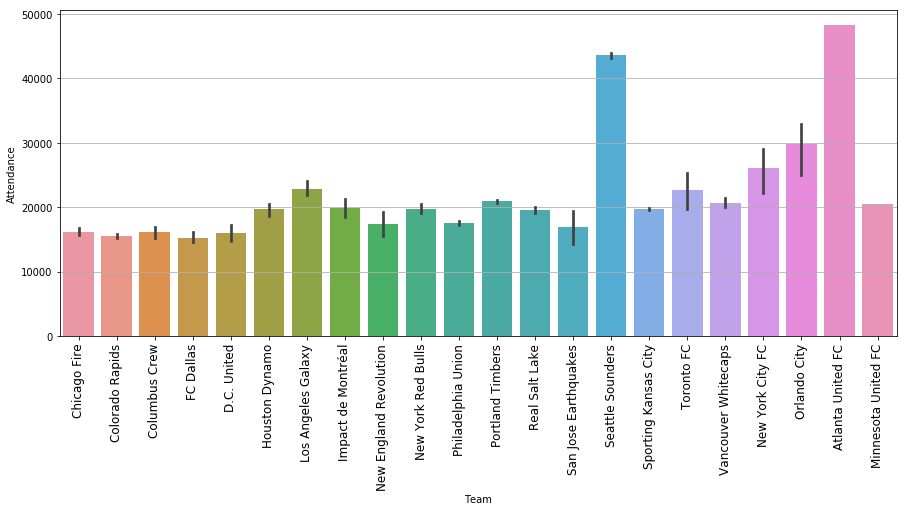

In [79]:
## plot the attendance data using seaborn library
plt.figure(figsize=(15,6))
sns.barplot(data=historical_attendence_data_1_for_chart,x="Team",y="Attendance")
plt.xticks(fontsize=12,rotation=90)
plt.grid(axis="y")

In [28]:
# import the 2011 - 2017 performance data - years in index
historical_performance_data_0= pd.read_excel("Resources/MLS_Historical_Performance.xlsx")

# add 1 year to the actual year data - since the performance of last will impact the attendace of next year
historical_performance_data_0.rename(columns={"Year":"Actual_Year"},inplace=True)
historical_performance_data_0["Year"]=historical_performance_data_0["Actual_Year"]+1
historical_performance_data_0.head()

,Pos,Team,Pld,W,L,D,Pts,Actual_Year,Year
0,1,Los Angeles Galaxy,34,19,5,10,67,2011,2012
1,2,Seattle Sounders,34,18,7,9,63,2011,2012
2,3,Real Salt Lake,34,15,11,8,53,2011,2012
3,4,FC Dallas,34,15,12,7,52,2011,2012
4,5,Sporting Kansas City,34,13,9,12,51,2011,2012


In [92]:
historical_performance_data_1=historical_performance_data_0.set_index(["Team","Year"])[['Pos','Pts']]
historical_performance_data_1.head()

,,Pos,Pts
Team,Year,,
Los Angeles Galaxy,2012,1,67
Seattle Sounders,2012,2,63
Real Salt Lake,2012,3,53
FC Dallas,2012,4,52
Sporting Kansas City,2012,5,51


In [32]:
## create dataframe with years in index
historical_performance_data = historical_performance_data_0.pivot(index="Team",columns="Actual_Year",values="Pts")
historical_performance_data.head()

Actual_Year,2011,2012,2013,2014,2015,2016,2017
Team,,,,,,,
Atlanta United FC,NaN,NaN,NaN,NaN,NaN,NaN,55.0
Chicago Fire,43.0,57.0,49.0,36.0,30.0,31.0,55.0
Chivas USA,36.0,30.0,26.0,33.0,NaN,NaN,NaN
Colorado Rapids,49.0,37.0,51.0,32.0,37.0,58.0,33.0
Columbus Crew,47.0,52.0,41.0,52.0,53.0,36.0,54.0


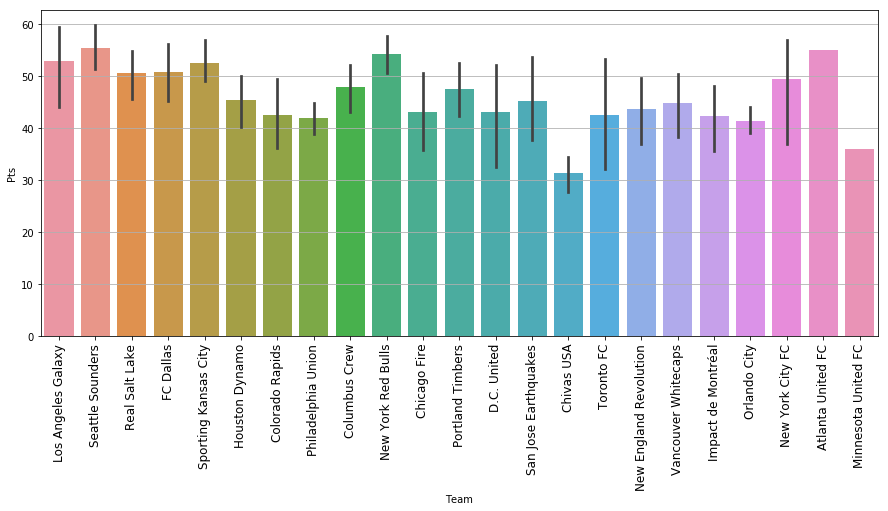

In [31]:
## plot the attendance data using seaborn library
plt.figure(figsize=(15,6))
sns.barplot(data=historical_performance_data_0,x="Team",y="Pts")
plt.xticks(fontsize=12,rotation=90)
plt.grid(axis="y")

In [93]:
# merge attendence data with performance data
merged = pd.merge(historical_attendence_data_1,historical_performance_data_1,suffixes=("_attendence", "_performance"),left_index=True,right_index=True) 
merged.head()

Attendance  Pos  Pts
Team         Year                      
Chicago Fire 2012     16409.0   11   43
             2013     15228.0    6   57
             2014     16076.0   12   49
             2015     16003.0   15   36
             2016     15602.0   20   30

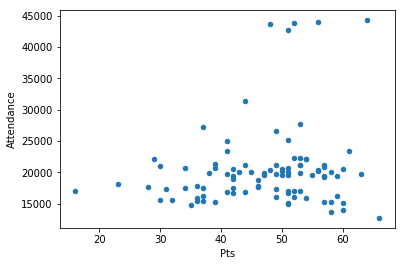

In [34]:
merged.plot(kind="scatter",y="Attendance",x="Pts")

In [37]:
# import 2012-2017 age data
age_df = pd.read_csv("Output/age_data.csv")
age_df

,Unnamed: 0,City & State,Year,Total Population,Age 18 to 29,Age 30 to 44,Team
0,0,"Atlanta city, Georgia",2012,425931,107143,101845,Atlanta United FC
1,1,"Seattle city, Washington",2012,612916,141245,157786,Seattle Sounders
2,2,"Orlando city, Florida",2012,240185,57870,56140,Orlando City
3,3,"New York city, New York",2012,8199221,1593289,1828653,New York City FC
4,4,"Carson city, California",2012,91937,16448,18000,Los Angeles Galaxy
5,5,"Newark city, New Jersey",2012,276478,56131,64131,New York Red Bulls
6,6,"Portland city, Oregon",2012,585888,113642,150432,Portland Timbers
7,7,"Minneapolis city, Minnesota",2012,385023,101775,88109,Minnesota United FC
8,8,"San Jose city, California",2012,954379,163311,224103,San Jose Earthquakes
9,9,"Kansas City city, Kansas",2012,145605,25380,28695,Sporting Kansas City


In [40]:
# Create column to hold percentile calculation for first age group and format it
age_df["Age % 18 to 29"] = age_df["Age 18 to 29"] / age_df["Total Population"] * 100
#age_df["Age % 18 to 29"] = age_df["Age % 18 to 29"].map("{:.1f}".format)

# Create column to hold percentile calculation for second age group and format it
age_df["Age % 30 to 44"] = age_df["Age 30 to 44"] / age_df["Total Population"] * 100
#age_df["Age % 30 to 44"] = age_df["Age % 30 to 44"].map("{:.1f}".format)

age_df

,Year,Team,City & State,Total Population,Age 18 to 29,Age 30 to 44,Age % 18 to 29,Age % 30 to 44
0,2012,Atlanta United FC,"Atlanta city, Georgia",425931,107143,101845,25.155013,23.911150
1,2012,Seattle Sounders,"Seattle city, Washington",612916,141245,157786,23.044757,25.743495
2,2012,Orlando City,"Orlando city, Florida",240185,57870,56140,24.093928,23.373649
3,2012,New York City FC,"New York city, New York",8199221,1593289,1828653,19.432200,22.302765
4,2012,Los Angeles Galaxy,"Carson city, California",91937,16448,18000,17.890512,19.578624
5,2012,New York Red Bulls,"Newark city, New Jersey",276478,56131,64131,20.302158,23.195697
6,2012,Portland Timbers,"Portland city, Oregon",585888,113642,150432,19.396540,25.675897
7,2012,Minnesota United FC,"Minneapolis city, Minnesota",385023,101775,88109,26.433486,22.884087
8,2012,San Jose Earthquakes,"San Jose city, California",954379,163311,224103,17.111755,23.481552
9,2012,Sporting Kansas City,"Kansas City city, Kansas",145605,25380,28695,17.430720,19.707428


In [64]:
age_df_1=age_df.set_index(["Team","Year"])[['Age % 18 to 29', 'Age % 30 to 44']]
age_df_1.head()


,,Age % 18 to 29,Age % 30 to 44
Team,Year,,
Atlanta United FC,2012,25.155013,23.911150
Seattle Sounders,2012,23.044757,25.743495
Orlando City,2012,24.093928,23.373649
New York City FC,2012,19.432200,22.302765
Los Angeles Galaxy,2012,17.890512,19.578624


In [45]:
# import 2012-2017 ethnicity data
ethnicity_df = pd.read_csv("Output/Ethnicity_Data.csv")
ethnicity_df

,Unnamed: 0,City & State,Year,Total Population,White,Black/Afro-American,Latino,Asian,Team
0,0,"Atlanta city, Georgia",2012,425931,166054,229317,22929,14160,Atlanta United FC
1,1,"Seattle city, Washington",2012,612916,432714,47887,37880,85935,Seattle Sounders
2,2,"Orlando city, Florida",2012,240185,139251,69373,61886,7873,Orlando City
3,3,"New York city, New York",2012,8199221,3646181,2059279,2343458,1053649,New York City FC
4,4,"Carson city, California",2012,91937,29620,17968,36340,23769,Los Angeles Galaxy
5,5,"Newark city, New Jersey",2012,276478,76275,143713,91931,4508,New York Red Bulls
6,6,"Portland city, Oregon",2012,585888,454159,37922,54420,42426,Portland Timbers
7,7,"Minneapolis city, Minnesota",2012,385023,263089,67461,38156,21153,Minnesota United FC
8,8,"San Jose city, California",2012,954379,448526,29674,315241,310783,San Jose Earthquakes
9,9,"Kansas City city, Kansas",2012,145605,86500,39568,40187,4067,Sporting Kansas City


In [47]:
# Create percentage calculations for ethnicity
ethnicity_df["White Percentage"] = ethnicity_df["White"] / ethnicity_df["Total Population"] * 100
ethnicity_df["Black Percentage"] = ethnicity_df["Black/Afro-American"] / ethnicity_df["Total Population"] * 100
ethnicity_df["Latino Percentage"] = ethnicity_df["Latino"] / ethnicity_df["Total Population"] * 100
ethnicity_df["Asian Percentage"] = ethnicity_df["Asian"] / ethnicity_df["Total Population"] * 100

# Format new columns
#ethnicity_df["White Percentage"] = ethnicity_df["White Percentage"].map("{:.1f}".format)
#ethnicity_df["Black Percentage"] = ethnicity_df["Black Percentage"].map("{:.1f}".format)
#ethnicity_df["Latino Percentage"] = ethnicity_df["Latino Percentage"].map("{:.1f}".format)
#ethnicity_df["Asian Percentage"] = ethnicity_df["Asian Percentage"].map("{:.1f}".format)

ethnicity_df

,Unnamed: 0,City & State,Year,Total Population,White,Black/Afro-American,Latino,Asian,Team,White Percentage,Black Percentage,Latino Percentage,Asian Percentage
0,0,"Atlanta city, Georgia",2012,425931,166054,229317,22929,14160,Atlanta United FC,38.986127,53.839002,5.383266,3.324482
1,1,"Seattle city, Washington",2012,612916,432714,47887,37880,85935,Seattle Sounders,70.599234,7.812979,6.180292,14.020681
2,2,"Orlando city, Florida",2012,240185,139251,69373,61886,7873,Orlando City,57.976560,28.883153,25.765972,3.277890
3,3,"New York city, New York",2012,8199221,3646181,2059279,2343458,1053649,New York City FC,44.469847,25.115545,28.581471,12.850599
4,4,"Carson city, California",2012,91937,29620,17968,36340,23769,Los Angeles Galaxy,32.217714,19.543818,39.527067,25.853574
5,5,"Newark city, New Jersey",2012,276478,76275,143713,91931,4508,New York Red Bulls,27.588090,51.979904,33.250747,1.630509
6,6,"Portland city, Oregon",2012,585888,454159,37922,54420,42426,Portland Timbers,77.516351,6.472568,9.288465,7.241316
7,7,"Minneapolis city, Minnesota",2012,385023,263089,67461,38156,21153,Minnesota United FC,68.330723,17.521291,9.910057,5.493958
8,8,"San Jose city, California",2012,954379,448526,29674,315241,310783,San Jose Earthquakes,46.996633,3.109247,33.031008,32.563898
9,9,"Kansas City city, Kansas",2012,145605,86500,39568,40187,4067,Sporting Kansas City,59.407301,27.174891,27.600014,2.793173


In [56]:
ethnicity_df_1=ethnicity_df.set_index(["Team","Year"])[['White Percentage',
       'Black Percentage', 'Latino Percentage', 'Asian Percentage']]

In [58]:
ethnicity_df_1.head()

,,White Percentage,Black Percentage,Latino Percentage,Asian Percentage
Team,Year,,,,
Atlanta United FC,2012,38.986127,53.839002,5.383266,3.324482
Seattle Sounders,2012,70.599234,7.812979,6.180292,14.020681
Orlando City,2012,57.976560,28.883153,25.765972,3.277890
New York City FC,2012,44.469847,25.115545,28.581471,12.850599
Los Angeles Galaxy,2012,32.217714,19.543818,39.527067,25.853574


In [65]:
# import 2012-2017 income data
income_df = pd.read_csv("Output/Income_Data.csv")
income_df

,Unnamed: 0,City & State,Year,Total Households,Less Than 10k,10k to 19k,20k to 34k,35k to 49k,50k to 74k,75k to 99k,100k or More,Team
0,0,"Atlanta city, Georgia",2012,82411,3927,5767,8848,8415,12978,9297,33179,Atlanta United FC
1,1,"Seattle city, Washington",2012,135156,3116,4740,9032,10904,21507,19591,66266,Seattle Sounders
2,2,"Orlando city, Florida",2012,39155,1592,3130,5172,5452,8160,4956,10693,Orlando City
3,3,"New York city, New York",2012,990609,32020,55634,99465,94989,159436,137947,411118,New York City FC
4,4,"Carson city, California",2012,18831,436,975,1756,1990,3318,3627,6729,Los Angeles Galaxy
5,5,"Newark city, New Jersey",2012,21652,851,1690,2796,2643,4780,3071,5821,New York Red Bulls
6,6,"Portland city, Oregon",2012,133777,3948,7286,13251,15980,26782,20941,45589,Portland Timbers
7,7,"Minneapolis city, Minnesota",2012,83163,2419,4179,8173,9708,16267,13284,29133,Minnesota United FC
8,8,"San Jose city, California",2012,178328,3451,5992,10920,13542,24284,23536,96603,San Jose Earthquakes
9,9,"Kansas City city, Kansas",2012,32123,1880,2936,5906,5109,7287,4232,4773,Sporting Kansas City


In [67]:
# Create percentage calculations for income
income_df["less than 34k"] = income_df["Less Than 10k"] +income_df["10k to 19k"] +income_df["20k to 34k"] 
income_df["less than 34k Percentage"] = income_df["less than 34k"]/ income_df["Total Households"] * 100

income_df["34k to 99k"] = income_df["35k to 49k"] +income_df["50k to 74k"] +income_df["75k to 99k"]
income_df["34k to 99k Percentage"] = income_df["34k to 99k"]/ income_df["Total Households"] * 100

#income_df["100k or more"] = income_df["100k or more"] 
income_df["100k or more Percentage"] = income_df["100k or More"] / income_df["Total Households"] * 100

,Unnamed: 0,City & State,Year,Total Households,Less Than 10k,10k to 19k,20k to 34k,35k to 49k,50k to 74k,75k to 99k,100k or More,Team,less than 34k,less than 34k Percentage,34k to 99k,34k to 99k Percentage,100k or more Percentage
0,0,"Atlanta city, Georgia",2012,82411,3927,5767,8848,8415,12978,9297,33179,Atlanta United FC,18542,22.499424,30690,37.240174,40.260402
1,1,"Seattle city, Washington",2012,135156,3116,4740,9032,10904,21507,19591,66266,Seattle Sounders,16888,12.495191,52002,38.475539,49.029270
2,2,"Orlando city, Florida",2012,39155,1592,3130,5172,5452,8160,4956,10693,Orlando City,9894,25.268803,18568,47.421785,27.309411
3,3,"New York city, New York",2012,990609,32020,55634,99465,94989,159436,137947,411118,New York City FC,187119,18.889289,392372,39.609170,41.501541
4,4,"Carson city, California",2012,18831,436,975,1756,1990,3318,3627,6729,Los Angeles Galaxy,3167,16.818013,8935,47.448356,35.733631
5,5,"Newark city, New Jersey",2012,21652,851,1690,2796,2643,4780,3071,5821,New York Red Bulls,5337,24.648993,10494,48.466654,26.884352
6,6,"Portland city, Oregon",2012,133777,3948,7286,13251,15980,26782,20941,45589,Portland Timbers,24485,18.302847,63703,47.618798,34.078354
7,7,"Minneapolis city, Minnesota",2012,83163,2419,4179,8173,9708,16267,13284,29133,Minnesota United FC,14771,17.761505,39259,47.207292,35.031204
8,8,"San Jose city, California",2012,178328,3451,5992,10920,13542,24284,23536,96603,San Jose Earthquakes,20363,11.418846,61362,34.409627,54.171527
9,9,"Kansas City city, Kansas",2012,32123,1880,2936,5906,5109,7287,4232,4773,Sporting Kansas City,10722,33.377953,16628,51.763534,14.858513


In [104]:
income_df_1 = income_df.set_index(["Team","Year"])[['less than 34k Percentage','34k to 99k Percentage', '100k or more Percentage']]
income_df_1

,,less than 34k Percentage,34k to 99k Percentage,100k or more Percentage
Team,Year,,,
Atlanta United FC,2012,22.499424,37.240174,40.260402
Seattle Sounders,2012,12.495191,38.475539,49.029270
Orlando City,2012,25.268803,47.421785,27.309411
New York City FC,2012,18.889289,39.609170,41.501541
Los Angeles Galaxy,2012,16.818013,47.448356,35.733631
New York Red Bulls,2012,24.648993,48.466654,26.884352
Portland Timbers,2012,18.302847,47.618798,34.078354
Minnesota United FC,2012,17.761505,47.207292,35.031204
San Jose Earthquakes,2012,11.418846,34.409627,54.171527


In [105]:
# merge demographic data into dataframe -1. age
merged2 = pd.merge(merged,age_df_1,left_index=True,right_index=True) 
merged2.head()

Attendance  Pos  Pts  Age % 18 to 29  Age % 30 to 44
Team         Year                                                      
Chicago Fire 2012     16409.0   11   43       15.767964       18.152983
             2013     15228.0    6   57       15.950659       17.457617
             2014     16076.0   12   49       13.818731       18.833837
             2015     16003.0   15   36       13.863928       19.157650
             2016     15602.0   20   30       13.888041       20.188023

In [106]:
# merge demographic data into dataframe -2 ethnicity
merged3 = pd.merge(merged2,ethnicity_df_1,left_index=True,right_index=True) 
merged3.head()

Attendance  Pos  Pts  Age % 18 to 29  Age % 30 to 44  \
Team         Year                                                         
Chicago Fire 2012     16409.0   11   43       15.767964       18.152983   
             2013     15228.0    6   57       15.950659       17.457617   
             2014     16076.0   12   49       13.818731       18.833837   
             2015     16003.0   15   36       13.863928       19.157650   
             2016     15602.0   20   30       13.888041       20.188023   

                   White Percentage  Black Percentage  Latino Percentage  \
Team         Year                                                          
Chicago Fire 2012         84.225936          3.159693          16.823228   
             2013         85.045877          2.910616          16.959349   
             2014         86.368580          2.247734          17.093656   
             2015         86.478391          2.121157          16.730852   
             2016         85.837250          3.949698          16.989195   

                   Asian Percentage  
Team         Year                    
Chicago Fire 2012          6.416982  
             2013          5.462721  
             2014          4.549849  
             2015          4.517391  
             2016          5.182834

In [129]:
# merge demographic data into dataframe -3 income
merged_final = pd.merge(merged3,income_df_1,left_index=True,right_index=True) 
merged_final

Attendance  Pos  Pts  Age % 18 to 29  \
Team                 Year                                         
Chicago Fire         2012     16409.0   11   43       15.767964   
                     2013     15228.0    6   57       15.950659   
                     2014     16076.0   12   49       13.818731   
                     2015     16003.0   15   36       13.863928   
                     2016     15602.0   20   30       13.888041   
                     2017     17383.0   20   31       13.888041   
Colorado Rapids      2012     15175.0    7   49       17.041087   
                     2013     15440.0   14   37       15.267046   
                     2014     15082.0    8   51       14.717577   
                     2015     15657.0   17   32       14.281174   
                     2016     16278.0   19   37       14.237111   
                     2017     15322.0    2   58       14.237111   
Columbus Crew        2012     14397.0    9   47       23.960727   
                     2013     16080.0   10   52       23.642570   
                     2014     16881.0   16   41       23.500664   
                     2015     16985.0    7   52       23.517000   
                     2016     17125.0    4   53       23.406942   
                     2017     15439.0   18   36       23.406942   
D.C. United          2012     13846.0   13   39       25.351501   
                     2013     13646.0    3   58       25.245451   
                     2014     17030.0   19   16       25.024932   
                     2015     16244.0    3   59       24.623774   
                     2016     17081.0    8   51       24.195572   
                     2017     17904.0   10   46       24.195572   
FC Dallas            2012     14199.0    4   52       10.335716   
                     2013     15373.0   13   39       10.226988   
                     2014     16816.0   15   44        9.990115   
                     2015     16015.0    6   54       10.090931   
                     2016     14094.0    2   60        9.260124   
                     2017     15122.0    1   60        9.260124   
...                               ...  ...  ...             ...   
Portland Timbers     2012     20438.0   12   42       19.396540   
                     2013     20674.0   17   34       19.007142   
                     2014     20806.0    3   57       18.719547   
                     2015     21144.0   11   49       18.416677   
                     2016     21144.0    5   53       18.197712   
                     2017     21144.0   12   44       18.197712   
Real Salt Lake       2012     19087.0    3   53       15.561897   
                     2013     19218.0    5   57       15.866339   
                     2014     20351.0    4   56       15.666715   
                     2015     20160.0    4   56       15.469831   
                     2016     19759.0   16   41       15.294017   
                     2017     18781.0    9   46       15.294017   
San Jose Earthquakes 2012     13293.0   14   38       17.111755   
                     2013     12765.0    1   66       17.068169   
                     2014     14947.0   10   51       16.920269   
                     2015     20979.0   18   30       16.852407   
                     2016     19930.0   13   47       16.949502   
                     2017     19875.0   17   38       16.949502   
Seattle Sounders     2012     43144.0    2   63       23.044757   
                     2013     44038.0    7   56       22.800918   
                     2014     43734.0    6   52       22.767579   
                     2015     44247.0    1   64       22.874902   
                     2016     42636.0    6   51       22.956751   
                     2017     43666.0    7   48       22.956751   
Sporting Kansas City 2012     19404.0    5   51       17.430720   
                     2013     19708.0    2   63       17.225288   
                     2014     20003.0    2   58       17.066627   
       

In [108]:
merged_final.columns

Index(['Attendance', 'Pos', 'Pts', 'Age % 18 to 29', 'Age % 30 to 44',
       'White Percentage', 'Black Percentage', 'Latino Percentage',
       'Asian Percentage', 'less than 34k Percentage', '34k to 99k Percentage',
       '100k or more Percentage'],
      dtype='object')

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


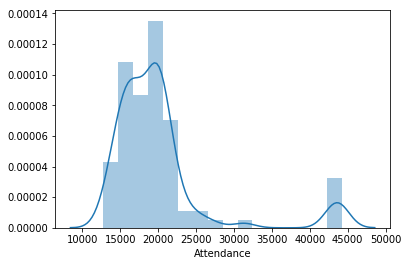

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


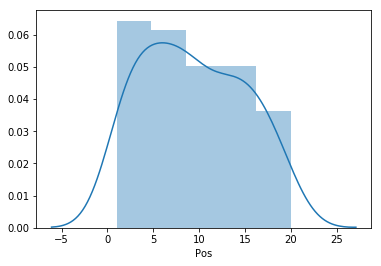

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


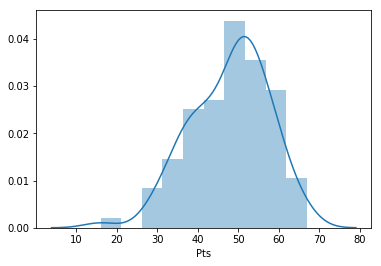

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


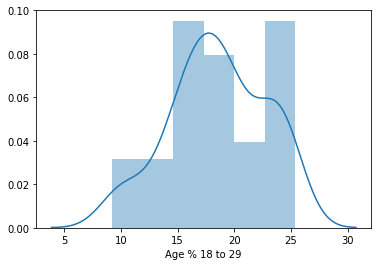

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


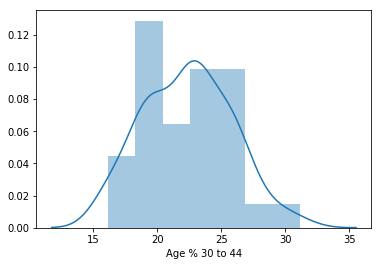

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


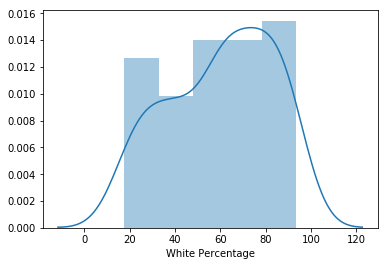

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


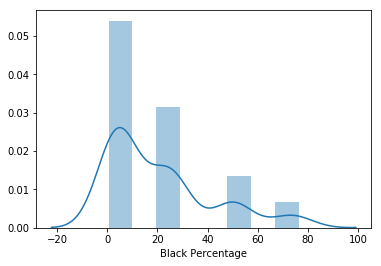

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


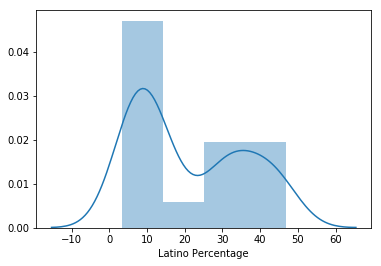

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


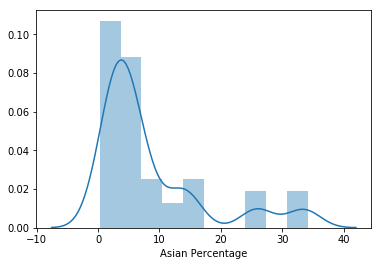

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


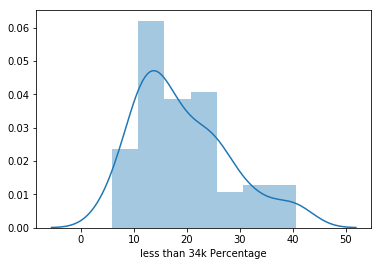

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


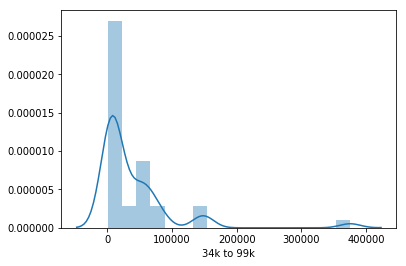

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


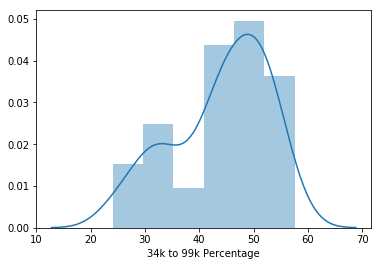

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


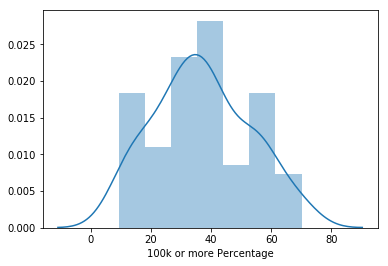

In [103]:
for vars in merged_final.columns:
    sns.distplot(merged_final[vars])
    plt.show()

In [147]:
import statsmodels.api as sm

X = merged_final[[ 'Pts', 'Age % 18 to 29', 'White Percentage', 'Black Percentage', 'Asian Percentage','less than 34k Percentage', '100k or more Percentage']]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Attendance   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     187.2
Date:                Thu, 26 Jul 2018   Prob (F-statistic):           1.26e-49
Time:                        21:42:25   Log-Likelihood:                -939.40
No. Observations:                  94   AIC:                             1893.
Df Residuals:                      87   BIC:                             1911.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pts                        166.9381     55.879      2.988      0.004      55.873     278.003
Age % 18 to 29            1187.5578    185.662      6.396      0.000     818.534    1556.581
White Percentage          -282.0083     86.017     -3.279      0.002    -452.977    -111.040
Black Percentage          -569.4140    132.239     -4.306      0.000    -832.253    -306.575
Asian Percentage          -475.0130    176.454     -2.692      0.009    -825.734    -124.292
less than 34k Percentage   563.1273    205.276      2.743      0.007     155.118     971.136
100k or more Percentage    329.3226    111.800      2.946      0.004     107.109     551.537
==============================================================================
Omnibus:                       14.425   Durbin-Watson:                   0.592
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.287
Skew:                           0.858   Prob(JB):                     0.000291
Kurtosis:                       4.101   Cond. No.                         52.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

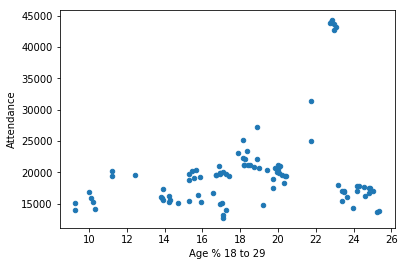

In [132]:
merged_final.plot(kind="scatter",x="Age % 18 to 29",y="Attendance")